In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

house = load_boston()
house.keys()

house_df = pd.DataFrame(house.data, columns= house.feature_names)
house_df.to_pickle('dataset/house_df.pkl')
house_df = pd.read_pickle('dataset/house_df.pkl')
house_df['PRICE'] = house.target
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
house_df.shape

(506, 14)

In [9]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

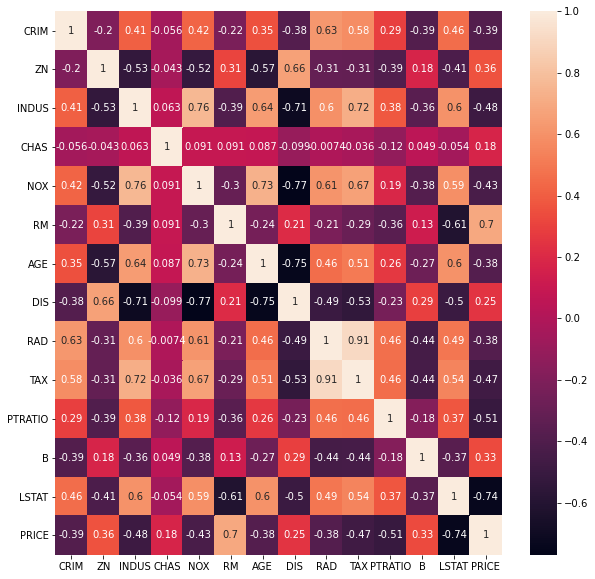

In [10]:
hc = house_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(hc, annot=True)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = house_df['PRICE']
X_data = house_df.drop(['PRICE'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=156)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

np.set_printoptions(precision=6, suppress=True)
print('MSE:{:.4f}, RMSE:{:.4f}, r2:{:.4f}'.format(mse,rmse,r2))
print('절편:', lr.intercept_)
print('회귀계수:', np.round(lr.coef_,2))

MSE:17.2969, RMSE:4.1590, r2:0.7572
절편: 40.995595172164336
회귀계수: [ -0.11   0.07   0.03   3.05 -19.8    3.35   0.01  -1.74   0.36  -0.01
  -0.92   0.01  -0.57]


In [27]:
coeff = pd.Series(data=np.round(lr.coef_,2),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.3500
CHAS        3.0500
RAD         0.3600
ZN          0.0700
INDUS       0.0300
AGE         0.0100
B           0.0100
TAX        -0.0100
CRIM       -0.1100
LSTAT      -0.5700
PTRATIO    -0.9200
DIS        -1.7400
NOX       -19.8000
dtype: float64

In [32]:
from sklearn.model_selection import cross_val_score

y_target = house_df['PRICE']
X_data = house_df.drop(['PRICE'],axis=1, inplace=False)

lr = LinearRegression()
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [ ]:
# [과제]
# 다중공선성, 과적합, 종속변수의 정규성 등을 고려하여 전처리 후 회귀분석 모델링, 학습 및 평가를 수행하세요.
# 모델링은 하이퍼 파라미터 옵션 포함하여 학습한 모든 방법 고려하여 수행

In [22]:
y_log = np.log1p(house_df['PRICE'])

<AxesSubplot:ylabel='Frequency'>

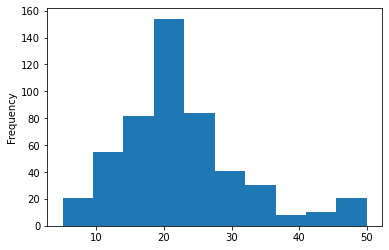

In [19]:
y_target.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

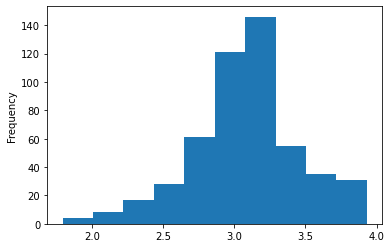

In [23]:
y_log.plot(kind='hist')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# y_target = house_df['PRICE']
y_log = np.log1p(house_df['PRICE'])
# X_data = house_df.drop(['PRICE'], axis=1)
X_data = house_df[['RM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'PTRATIO', 'LSTAT','RAD']]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_log,test_size=0.3,random_state=156)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('MSE:{:.4f}, RMSE:{:.4f}, r2:{:.4f}'.format(mse,rmse,r2))
print('절편:', lr.intercept_)
print('회귀계수:', np.round(lr.coef_,2))

MSE:0.0385, RMSE:0.1963, r2:0.7444
절편: 3.4658913279948957
회귀계수: [ 0.09  0.   -0.    0.14  0.   -0.03 -0.03 -0.  ]


In [29]:
coeff = pd.Series(data=np.round(lr.coef_,2),index=X_data.columns)
coeff.sort_values(ascending=False)

RM         0.1000
ZN        -0.0000
INDUS      0.0000
AGE        0.0000
RAD       -0.0000
LSTAT     -0.0300
PTRATIO   -0.0400
NOX       -0.5100
dtype: float64

#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE scores:  [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE : 5.518


In [38]:
alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mean_scores = cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mean_scores))
    print('alpha {}일 때 5 folds의 평균 RMSE:{:.4f}'.format(alpha,avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE:5.8287
alpha 0.1일 때 5 folds의 평균 RMSE:5.7885
alpha 1일 때 5 folds의 평균 RMSE:5.6526
alpha 10일 때 5 folds의 평균 RMSE:5.5182
alpha 100일 때 5 folds의 평균 RMSE:5.3296


In [40]:
from sklearn.linear_model import Lasso,ElasticNet

def get_linear_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('##### ',model_name , '#####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model= ElasticNet(alpha=param,l1_ratio=0.7)
        
        neg_mean_scores = cross_val_score(model,X_data_n,y_target_n,
                                          scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mean_scores))
        print('alpha {}일 때 5 폴드 세트의 평균 RMSE: {:.4f}'.format(param,avg_rmse))
        model.fit(X_data_n,y_target_n)
        coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [43]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_eval('Lasso',params=lasso_alphas,
                                X_data_n=X_data,y_target_n=y_target)
coeff_lasso_df

#####  Lasso #####
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.6123
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.6151
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.6691
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.7760
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.1888


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.0982,-0.0979,-0.0833,-0.0634,-0.0000
ZN,0.0491,0.0492,0.0495,0.0492,0.0372
INDUS,-0.0421,-0.0366,-0.0053,-0.0000,-0.0000
CHAS,1.4343,0.9552,0.0000,0.0000,0.0000
NOX,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
RM,3.7897,3.7032,2.4982,0.9498,0.0000
AGE,-0.0117,-0.0100,0.0036,0.0209,0.0425
DIS,-1.1766,-1.1605,-0.9366,-0.6688,-0.0000
RAD,0.2709,0.2747,0.2775,0.2642,0.0619
TAX,-0.0143,-0.0146,-0.0154,-0.0152,-0.0086


In [44]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.7897,3.7032,2.4982,0.9498,0.0000
CHAS,1.4343,0.9552,0.0000,0.0000,0.0000
RAD,0.2709,0.2747,0.2775,0.2642,0.0619
ZN,0.0491,0.0492,0.0495,0.0492,0.0372
B,0.0102,0.0102,0.0095,0.0082,0.0065
NOX,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
AGE,-0.0117,-0.0100,0.0036,0.0209,0.0425
TAX,-0.0143,-0.0146,-0.0154,-0.0152,-0.0086
INDUS,-0.0421,-0.0366,-0.0053,-0.0000,-0.0000
CRIM,-0.0982,-0.0979,-0.0833,-0.0634,-0.0000


In [46]:
elastic_alphas = [0.07,0.1,0.5,1,3] 
coeff_elastic_df = get_linear_eval('ElasticNet', params=elastic_alphas, 
                                      X_data_n=X_data,y_target_n=y_target)
coeff_elastic_df

#####  ElasticNet #####
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.5417
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.5259
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.4667
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.5969
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.0681


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.0995,-0.0992,-0.0891,-0.0736,-0.0191
ZN,0.0501,0.0506,0.0529,0.0521,0.0383
INDUS,-0.0449,-0.0427,-0.0233,-0.0000,-0.0000
CHAS,1.3307,0.9797,0.0000,0.0000,0.0000
NOX,-0.1751,-0.0000,-0.0000,-0.0000,-0.0000
RM,3.5742,3.4142,1.9184,0.9388,0.0000
AGE,-0.0101,-0.0083,0.0078,0.0203,0.0434
DIS,-1.1894,-1.1736,-0.9759,-0.7252,-0.0312
RAD,0.2789,0.2834,0.3008,0.2893,0.1468
TAX,-0.0145,-0.0148,-0.0160,-0.0162,-0.0114


In [47]:
sort_column = 'alpha:'+str(elastic_alphas[1])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.5742,3.4142,1.9184,0.9388,0.0000
CHAS,1.3307,0.9797,0.0000,0.0000,0.0000
RAD,0.2789,0.2834,0.3008,0.2893,0.1468
ZN,0.0501,0.0506,0.0529,0.0521,0.0383
B,0.0101,0.0101,0.0091,0.0083,0.0070
NOX,-0.1751,-0.0000,-0.0000,-0.0000,-0.0000
AGE,-0.0101,-0.0083,0.0078,0.0203,0.0434
TAX,-0.0145,-0.0148,-0.0160,-0.0162,-0.0114
INDUS,-0.0449,-0.0427,-0.0233,-0.0000,-0.0000
CRIM,-0.0995,-0.0992,-0.0891,-0.0736,-0.0191
